In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense,Flatten,Embedding,Conv1D,MaxPool2D,Bidirectional,GRU,GlobalAveragePooling1D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.callbacks import Callback
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDHLTNS/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDHLTNS/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDHLTNS/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_dataset=imdb['train']
test_dataset=imdb['test']

xtrain=[]
ytrain=[]

xtest=[]
ytest=[]



In [4]:
for i,j in train_dataset:
  xtrain.append(str(i.numpy()))
  ytrain.append(j.numpy())


for i,j in test_dataset:
  xtest.append(str(i.numpy()))
  ytest.append(j.numpy())


In [5]:
y_train=np.array(ytrain)
y_test=np.array(ytest)

In [6]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(xtrain)
index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(xtrain)
x_train=pad_sequences(sequences,maxlen=120,truncating='post')

sequences1=tokenizer.texts_to_sequences(xtest)
x_test=pad_sequences(sequences1,maxlen=120)

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in index.items()])


In [24]:
model=Sequential([Embedding(10000,16,input_length=120),
                  Conv1D(128, 5, activation='relu'),
                  GlobalAveragePooling1D(),
                  Dense(6,activation='relu'),
                  Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
a=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
model.save('GRU_imdbmodel.h5')

Epoch 1/10
782/782 [==============================] - 34s 10ms/step - loss: 0.4499 - accuracy: 0.7780 - val_loss: 0.3496 - val_accuracy: 0.8466
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2822 - accuracy: 0.8847 - val_loss: 0.3580 - val_accuracy: 0.8467
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2300 - accuracy: 0.9094 - val_loss: 0.3886 - val_accuracy: 0.8368
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1924 - accuracy: 0.9269 - val_loss: 0.4162 - val_accuracy: 0.8332
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1628 - accuracy: 0.9399 - val_loss: 0.4632 - val_accuracy: 0.8255
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1334 - accuracy: 0.9547 - val_loss: 0.5067 - val_accuracy: 0.8199
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1082 - accuracy: 0.9643 - val_loss: 0.5903 - val_accuracy: 0.8171
Epoc

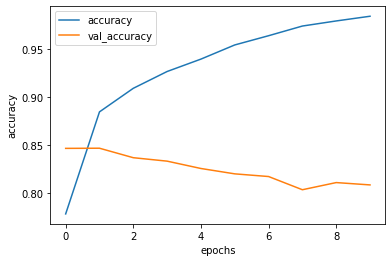

In [26]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])

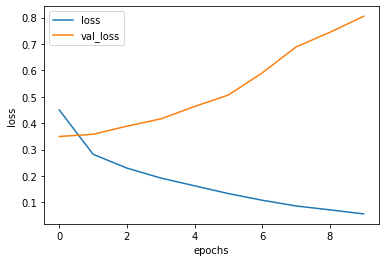

In [27]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])